In [2]:
#Shishir Khanal
#July 7, 2025
#VAR
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

df = pd.read_csv('M2SLMoneyStock.csv',index_col=0,parse_dates=True)
df.index.freq='MS'

sp = pd.read_csv('PCEPersonalSpending.csv',index_col=0,parse_dates=True)
sp.index.freq='MS'

In [3]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [5]:
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [16]:
df = df.join(sp)

In [17]:
df.shape

(252, 2)

In [18]:
df = df.dropna()

In [19]:
df.shape

(252, 2)

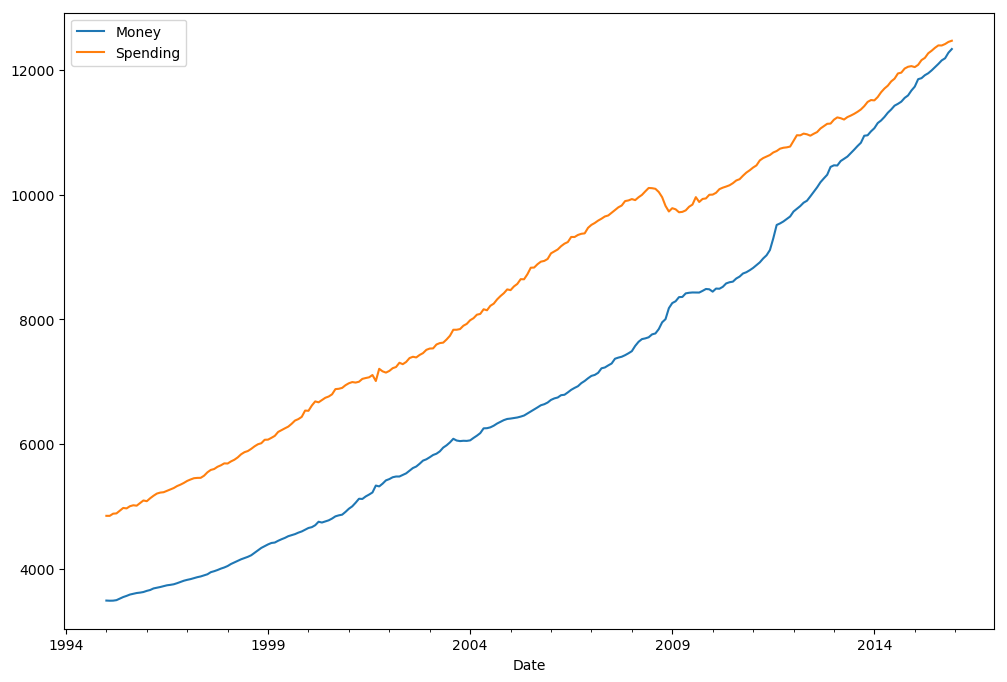

In [20]:
df.plot(figsize=(12,8))

In [29]:
def adf_test(series, title=''):
    print(f'Augmented D-F Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') #dropna to handle differenced data

    labels = ['ADF test statistic', 'p-value','# lags used', '# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})'] = val

    print(out.to_string()) #convert fom float64 to string

    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root and is non-stationary")

In [30]:
adf_test(df['Money'])

Augmented D-F Test: 
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject null hypothesis
Data has a unit root and is non-stationary


In [31]:
adf_test(df['Spending'])

Augmented D-F Test: 
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject null hypothesis
Data has a unit root and is non-stationary


In [32]:
df_transformed = df.diff()

In [33]:
adf_test(df_transformed['Money'])

Augmented D-F Test: 
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject null hypothesis
Data has a unit root and is non-stationary


In [34]:
adf_test(df_transformed['Spending'])

Augmented D-F Test: 
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [35]:
df_transformed = df_transformed.diff().dropna()

In [37]:
#df_transformed
adf_test(df_transformed['Money'])

Augmented D-F Test: 
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [38]:
adf_test(df_transformed['Spending'])

Augmented D-F Test: 
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [39]:
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [40]:
df_transformed.shape

(250, 2)

In [41]:
#Num of observations
nobs = 12
train = df_transformed[:-nobs] #start = beginnning of DF --Go to--> -12 from end
test = df_transformed[-nobs:] #start = -12 from end --Go to--> end of DF

In [42]:
#Grid Search for order p AR of VAR model
model = VAR(train)

for p in [1,2,3,4,5,6,7]: #range(8)
    results = model.fit(p)
    print(f'Order {p}')
    print(f'AIC: {results.aic}')
    print('\n')


Order 1
AIC: 14.178610495220896


Order 2
AIC: 13.955189367163705


Order 3
AIC: 13.849518291541038


Order 4
AIC: 13.827950574458281


Order 5
AIC: 13.78730034460964


Order 6
AIC: 13.799076756885809


Order 7
AIC: 13.797638727913972




In [43]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Jul, 2025
Time:                     17:54:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [47]:
#Grab 5 lagged values right before test starts
#Numpy array

lagged_values = train.values[-5:]
lagged_values

array([[-31.9,  40.3],
       [  5.6, -70.7],
       [ 25.5,  52.5],
       [-21.3, -37.2],
       [ 39.5, -17.8]])

In [49]:
z = results.forecast(y=lagged_values,steps=12)

In [51]:
idx = pd.date_range('2015-01-01',periods=12,freq='MS')
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [55]:
df_forecast = pd.DataFrame(data=z,index=idx,columns=['Money_2d','Spending_2d'])
df_forecast

,Money_2d,Spending_2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


In [61]:
#Opposite of Differencing

#Add most recent first difference from training side of the original dataset to the forecast cumsum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money_2d'].cumsum()

#Build forecast values from first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [62]:
#Add most recent first difference from training side of the original dataset to the forecast cumsum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending_2d'].cumsum()

#Build forecast values from first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [63]:
df_forecast.head()

,Money_2d,Spending_2d,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549


In [64]:
test_range = df[-nobs:]

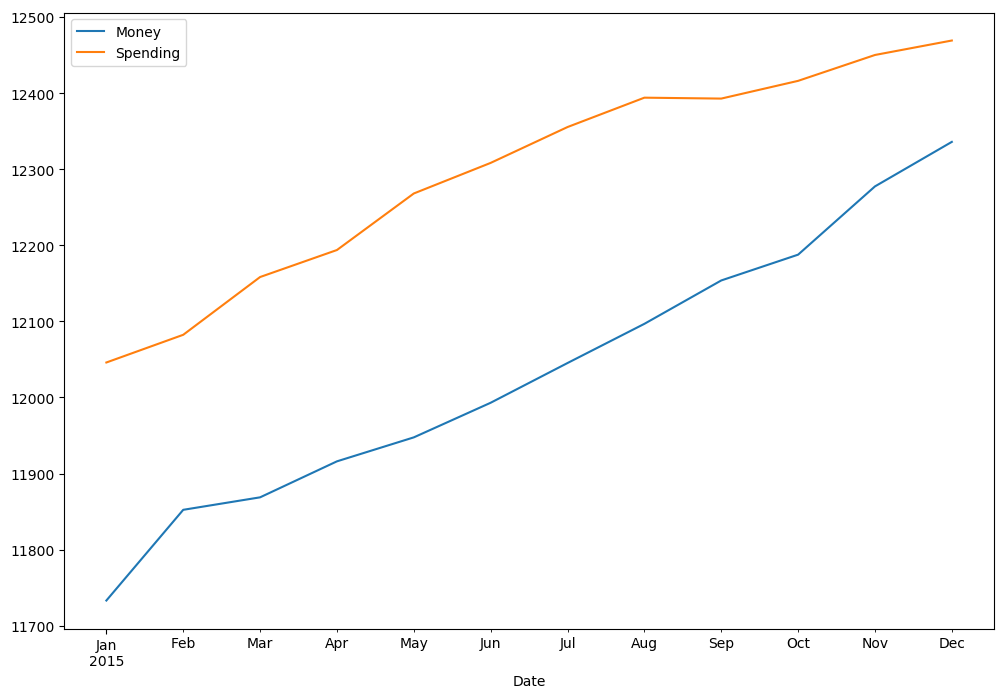

In [66]:
test_range.plot(figsize=(12,8),legend=True)

In [67]:
df_forecast.columns

Index(['Money_2d', 'Spending_2d', 'Money1d', 'MoneyForecast', 'Spending1d',
       'SpendingForecast'],
      dtype='object')

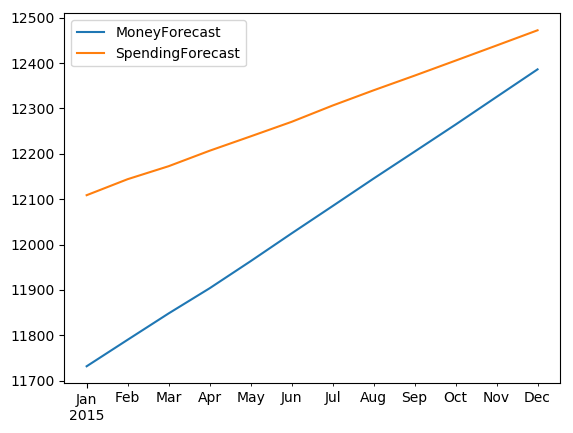

In [68]:
df_forecast[['MoneyForecast','SpendingForecast']].plot()

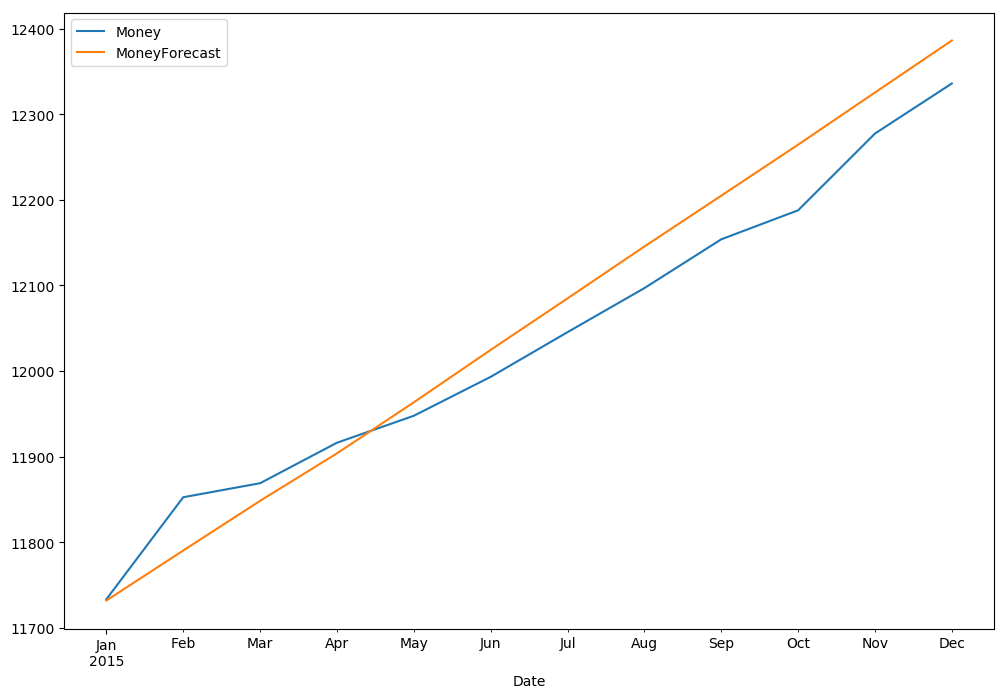

In [69]:
test_range['Money'].plot(figsize=(12,8),legend=True)
df_forecast['MoneyForecast'].plot(legend=True)

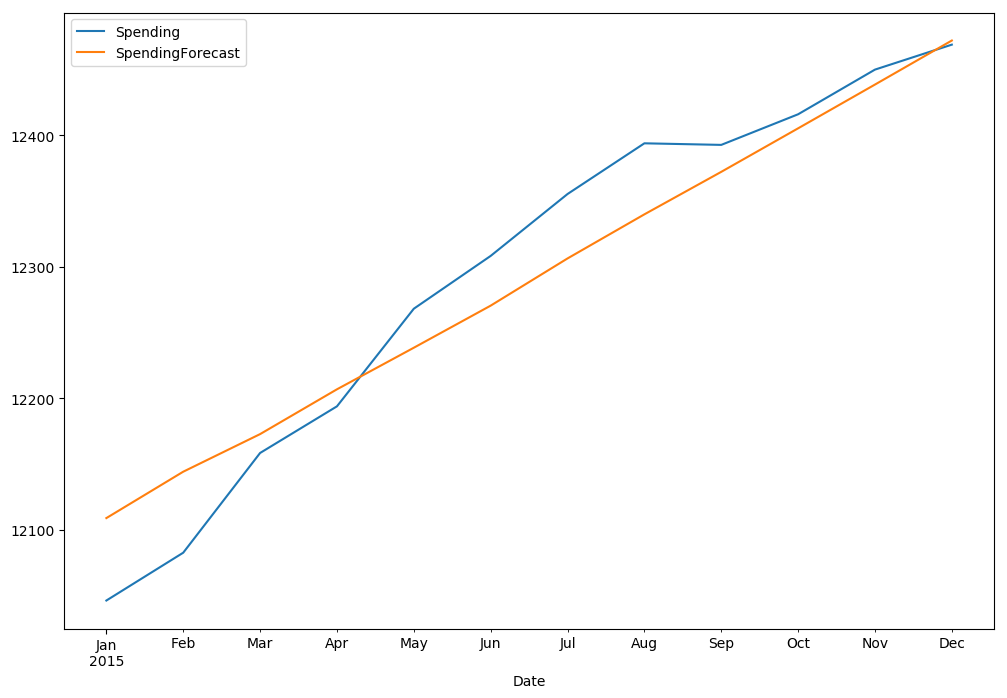

In [70]:
test_range['Spending'].plot(figsize=(12,8),legend=True)
df_forecast['SpendingForecast'].plot(legend=True)

In [72]:
rmse(test_range['Money'],df_forecast['MoneyForecast'])

43.71049653558938

In [73]:
test_range['Money'].mean()

12034.008333333333

In [74]:
rmse(test_range['Spending'],df_forecast['SpendingForecast'])

37.00117516940808

In [75]:
test_range['Spending'].mean()

12294.533333333335